In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

from sqlalchemy import create_engine,inspect

user = 'root'
password = 'bhanu%40123'
host = 'localhost'
port = '3306'
database = 'ola_rides_data'

engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}')

inspect(engine).get_table_names()

query = "select * from ola_rides;"
df = pd.read_sql(query,engine)

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for Cancelling by Customer,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Payment Method,Ride Distance,Driver Ratings,Customer Rating
0,28-01-2024,06:00:00,CNR1721175,Success,329258,Auto,Area-3,Area-2,5.42,18.46,...,None,0,None,0,None,868.06,Wallet,28.5,4.4,4.4
1,26-01-2024,03:00:00,CNR2871422,Cancelled by Driver,201414,Mini,Area-7,Area-6,NaN,NaN,...,None,1,The customer was coughing/sick,0,None,NaN,None,NaN,NaN,NaN
2,15-01-2024,16:00:00,CNR6875935,Cancelled by Driver,301629,Bike,Area-40,Area-24,NaN,NaN,...,None,1,Personal & Car related issues,0,None,NaN,None,NaN,NaN,NaN
3,02-01-2024,22:00:00,CNR6798834,Cancelled by Driver,319684,Prime Sedan,Area-11,Area-24,NaN,NaN,...,None,1,The customer was coughing/sick,0,None,NaN,None,NaN,NaN,NaN
4,30-01-2024,22:00:00,CNR9661713,Incomplete,330283,Bike,Area-41,Area-45,NaN,NaN,...,None,0,None,1,Other Issue,NaN,None,NaN,NaN,NaN


In [195]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,49999,2024-01-15 12:52:56.991539968,2024-01-01 00:00:00,2024-01-08 00:00:00,2024-01-15 00:00:00,2024-01-23 00:00:00,2024-01-31 00:00:00,NaN
Time,49999,2025-08-03 11:28:27.442148608,2025-08-03 00:00:00,2025-08-03 05:00:00,2025-08-03 12:00:00,2025-08-03 17:00:00,2025-08-03 23:00:00,NaN
Customer ID,49999.0,550979.937539,100001.0,328740.5,552598.0,773970.0,999991.0,258855.930945
Avg VTAT,33484.0,10.481654,1.0,5.73,10.46,15.24,20.0,5.490853
Avg CTAT,33484.0,15.56432,1.0,8.31,15.61,22.79,30.0,8.365313
Cancelled by Customer,49999.0,0.075982,0.0,0.0,0.0,0.0,1.0,0.264971
Cancelled Rides by Driver,49999.0,0.192204,0.0,0.0,0.0,0.0,1.0,0.394036
Incomplete Rides,49999.0,0.062121,0.0,0.0,0.0,0.0,1.0,0.241378
Booking Value,33484.0,1023.374286,50.1,532.9425,1023.35,1514.6775,2000.0,563.595072
Ride Distance,33484.0,25.447143,1.0,13.1,25.46,37.67,50.0,14.175953


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               49999 non-null  object 
 1   Time                               49999 non-null  object 
 2   Booking ID                         49999 non-null  object 
 3   Booking Status                     49999 non-null  object 
 4   Customer ID                        49999 non-null  int64  
 5   Vehicle Type                       49999 non-null  object 
 6   Pickup Location                    49999 non-null  object 
 7   Drop Location                      49999 non-null  object 
 8   Avg VTAT                           33484 non-null  float64
 9   Avg CTAT                           33484 non-null  float64
 10  Cancelled  by Customer             49999 non-null  int64  
 11  Reason for Cancelling by Customer  3799 non-null   obj

In [15]:
# Averege ride distance for each vehicle type
df.groupby("Vehicle Type")[['Ride Distance']].mean()


,Ride Distance
Vehicle Type,
Auto,25.740017
Bike,25.411473
Mini,25.583826
Prime Plus,25.153772
Prime SUV,25.396211
Prime Sedan,25.509234
eBike,25.337723


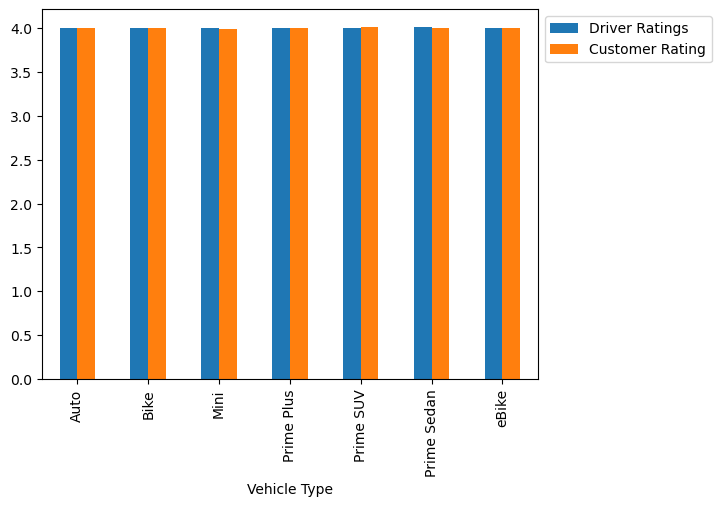

In [208]:
# Averege Driver Ratings and Customer Ratings for each vehicle type
(df.groupby("Vehicle Type")
 .agg({"Driver Ratings":"mean","Customer Rating":"mean"})
 .round(3)
 .plot.bar().legend(bbox_to_anchor=(1,1)),
 plt.savefig('Driver & Customer Ratings by Vehicle.png', dpi=300, bbox_inches='tight')
);

In [3]:
# Averege Driver Ratings and Customer Ratings for each vehicle type
(df.groupby("Vehicle Type")
 .agg({"Driver Ratings":"mean","Customer Rating":"mean"})
 .round(3))

,Driver Ratings,Customer Rating
Vehicle Type,,
Auto,4.006,4.006
Bike,4.000,3.996
Mini,4.004,3.992
Prime Plus,3.998,4.006
Prime SUV,4.001,4.013
Prime Sedan,4.010,3.999
eBike,4.002,4.000


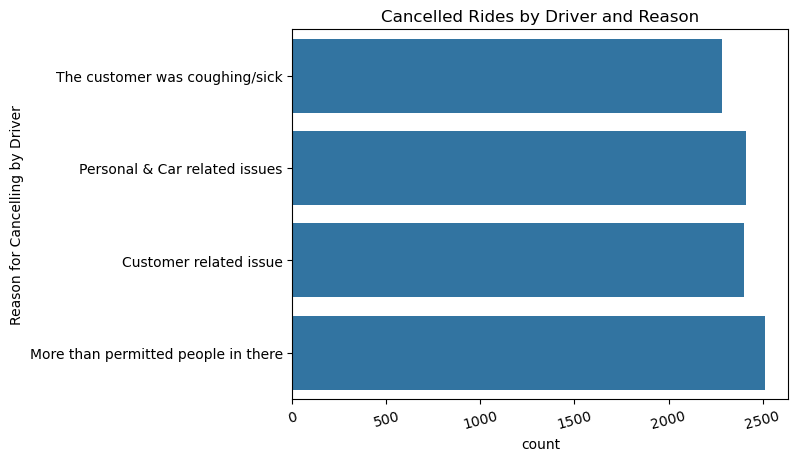

In [192]:
sns.countplot(data=df, y='Reason for Cancelling by Driver')
plt.title("Cancelled Rides by Driver and Reason")
plt.xticks(rotation=15)
plt.savefig('Reason for cancel by Driver.png', dpi=300, bbox_inches='tight')
plt.show()


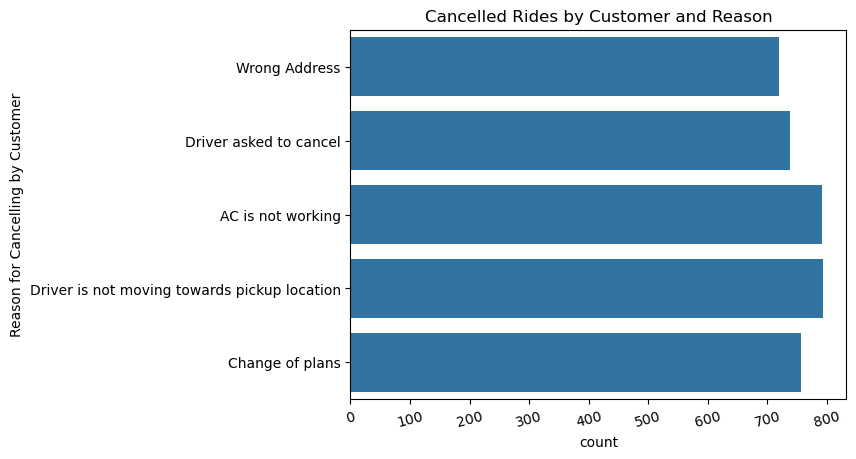

In [193]:
sns.countplot(data=df, y='Reason for Cancelling by Customer')
plt.title("Cancelled Rides by Customer and Reason")
plt.xticks(rotation=15)
plt.savefig('Reason For cancel by Customer.png', dpi=300, bbox_inches='tight')
plt.show()


In [71]:
query_1 = """
            with Cancel_reason as	(
                select
            	 case 
            			when `Cancelled  by Customer` = 1 then `Reason for Cancelling by Customer`
            			when `Cancelled Rides by Driver` = 1 then `Reason for Cancelling by Driver`
            			else `Incomplete Rides Reason` end as Incomplete_Rides_reason
            	 from ola_rides
            	where `Booking Status` in ("Cancelled by Driver","Cancelled by Customer","Incomplete")
            )
            select Incomplete_Rides_reason,count(*) as reason_count from Cancel_reason
            group by Incomplete_Rides_reason;
            """
Incomplete_Reasons_Count = pd.read_sql(query_1,engine)
Incomplete_Reasons_Count


,Incomplete_Rides_reason,reason_count
0,The customer was coughing/sick,2283
1,Personal & Car related issues,2413
2,Other Issue,1029
3,Vehicle Breakdown,986
4,Customer related issue,2402
5,Wrong Address,720
6,Driver asked to cancel,738
7,AC is not working,792
8,Driver is not moving towards pickup location,793
9,More than permitted people in there,2512


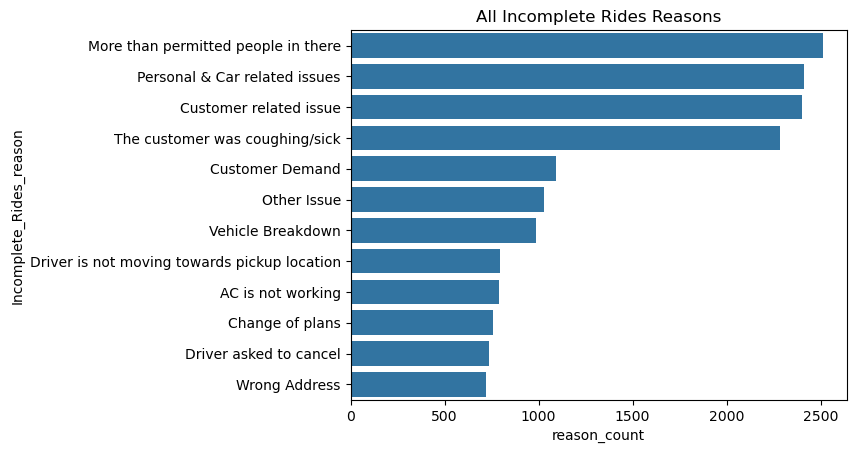

In [72]:
sf=Incomplete_Reasons_Count.sort_values(by="reason_count",ascending=False)
sns.barplot(x="reason_count",y="Incomplete_Rides_reason",data=sf)
plt.title("All Incomplete Rides Reasons")
plt.savefig('All Incomplete Rides Reasons.png', dpi=300, bbox_inches='tight')
plt.show()


## Performing type convertion on Date and Time columns

In [12]:

df['Date'] = pd.to_datetime(df['Date'],errors="coerce")
df['Time'] = pd.to_datetime(df['Time'],errors="coerce")


In [13]:
df['Day'] = df['Date'].dt.day
df['hour'] = df['Time'].dt.hour

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               49999 non-null  datetime64[ns]
 1   Time                               49999 non-null  datetime64[ns]
 2   Booking ID                         49999 non-null  object        
 3   Booking Status                     49999 non-null  object        
 4   Customer ID                        49999 non-null  int64         
 5   Vehicle Type                       49999 non-null  object        
 6   Pickup Location                    49999 non-null  object        
 7   Drop Location                      49999 non-null  object        
 8   Avg VTAT                           33484 non-null  float64       
 9   Avg CTAT                           33484 non-null  float64       
 10  Cancelled  by Customer            

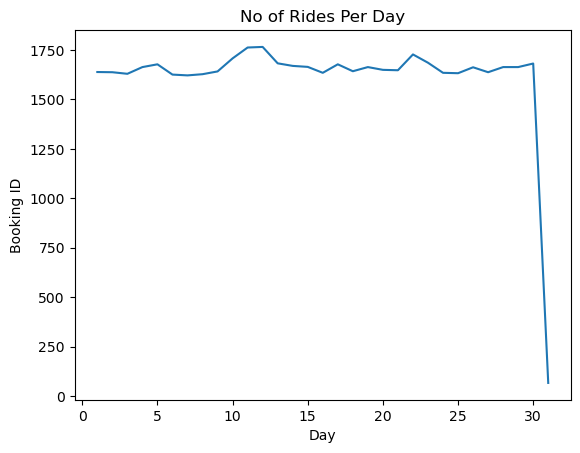

In [161]:
# A time-series chart showing the number of rides per day/week.
rides = df.pivot_table(
    index="Day",
    values = "Booking ID",
    aggfunc = "count"
)
sns.lineplot(x="Day",y="Booking ID",data=rides)
plt.title("No of Rides Per Day")
plt.savefig('NoOfRidesPerDay.png', dpi=300, bbox_inches='tight')
plt.show()

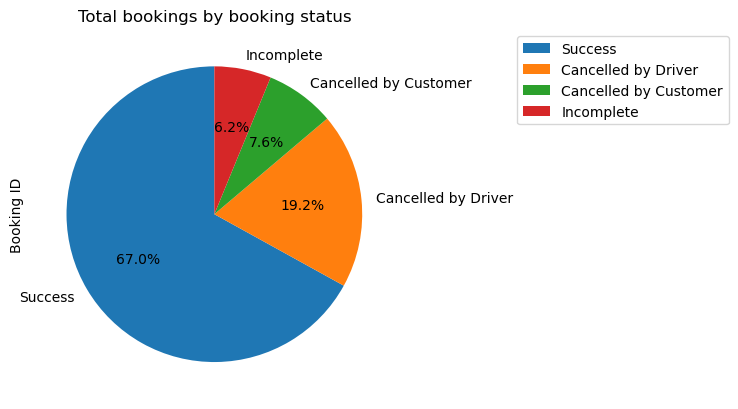

In [174]:
# Total bookings by booking status
(df.groupby('Booking Status')[['Booking ID']]
 .count()
 .sort_values(by ="Booking ID", ascending=False)
 .plot.pie(y="Booking ID",autopct='%1.1f%%',title = "Total bookings by booking status",startangle=90).legend(bbox_to_anchor=(1.3,1)),
 plt.savefig('bookingsByStatus.png', dpi=300, bbox_inches='tight')
);


### The heat map shows that in a day on which time maximum no of rides booked

In [7]:
#in a day on which time more rides booked
day_rides=df.pivot_table(
    index="Day",
    columns="hour",
    values="Booking ID",
    aggfunc="count"
).T
day_rides.style.background_gradient(cmap="RdYlGn",axis=None)


Day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,71.000000,80.000000,71.000000,64.000000,58.000000,69.000000,69.000000,60.000000,69.000000,94.000000,75.000000,68.000000,62.000000,88.000000,80.000000,67.000000,65.000000,81.000000,62.000000,64.000000,69.000000,67.000000,78.000000,64.000000,67.000000,68.000000,79.000000,72.000000,61.000000,63.000000,66.000000
1,74.000000,73.000000,55.000000,78.000000,75.000000,68.000000,64.000000,78.000000,59.000000,69.000000,61.000000,73.000000,77.000000,53.000000,81.000000,68.000000,75.000000,62.000000,76.000000,64.000000,77.000000,72.000000,65.000000,77.000000,75.000000,51.000000,66.000000,76.000000,62.000000,64.000000,nan
2,80.000000,64.000000,70.000000,67.000000,69.000000,79.000000,67.000000,67.000000,67.000000,78.000000,73.000000,65.000000,78.000000,70.000000,61.000000,74.000000,74.000000,79.000000,66.000000,77.000000,74.000000,65.000000,68.000000,74.000000,76.000000,76.000000,69.000000,81.000000,64.000000,68.000000,nan
3,69.000000,70.000000,64.000000,63.000000,63.000000,83.000000,73.000000,64.000000,78.000000,68.000000,62.000000,70.000000,64.000000,76.000000,70.000000,57.000000,68.000000,45.000000,85.000000,75.000000,69.000000,82.000000,60.000000,81.000000,68.000000,76.000000,76.000000,65.000000,76.000000,70.000000,nan
4,66.000000,67.000000,74.000000,66.000000,82.000000,85.000000,78.000000,66.000000,67.000000,56.000000,70.000000,84.000000,75.000000,70.000000,63.000000,54.000000,75.000000,72.000000,75.000000,64.000000,72.000000,60.000000,71.000000,64.000000,57.000000,75.000000,71.000000,62.000000,77.000000,60.000000,nan
5,62.000000,57.000000,65.000000,73.000000,73.000000,61.000000,59.000000,73.000000,63.000000,58.000000,75.000000,78.000000,69.000000,65.000000,76.000000,71.000000,68.000000,70.000000,76.000000,55.000000,66.000000,76.000000,53.000000,54.000000,76.000000,58.000000,58.000000,66.000000,80.000000,61.000000,nan
6,72.000000,66.000000,85.000000,69.000000,71.000000,56.000000,83.000000,71.000000,74.000000,63.000000,64.000000,60.000000,58.000000,66.000000,78.000000,71.000000,61.000000,65.000000,73.000000,74.000000,57.000000,83.000000,78.000000,63.000000,62.000000,76.000000,76.000000,80.000000,59.000000,65.000000,nan
7,81.000000,66.000000,61.000000,58.000000,77.000000,50.000000,74.000000,51.000000,84.000000,77.000000,71.000000,81.000000,79.000000,56.000000,65.000000,75.000000,77.000000,77.000000,55.000000,73.000000,58.000000,72.000000,70.000000,69.000000,83.000000,65.000000,81.000000,58.000000,69.000000,74.000000,nan
8,60.000000,65.000000,73.000000,73.000000,77.000000,58.000000,50.000000,54.000000,65.000000,78.000000,84.000000,63.000000,83.000000,64.000000,84.000000,56.000000,66.000000,67.000000,68.000000,52.000000,69.000000,57.000000,82.000000,64.000000,68.000000,79.000000,70.000000,78.000000,63.000000,79.000000,nan


In [53]:
day_rides=df.groupby(["Day","hour"])[['Booking ID']].count().sort_values(by="Booking ID",ascending=False)
top_rides=day_rides.head(5)
bottom_rides=dat_rides.tail(5)

In [54]:
print(top_rides)
print(bottom_rides)

          Booking ID
Day hour            
4   17           103
30  13            96
12  10            96
29  15            96
17  19            95
          Booking ID
Day hour            
7   8             50
20  11            50
14  22            50
25  16            48
18  3             45


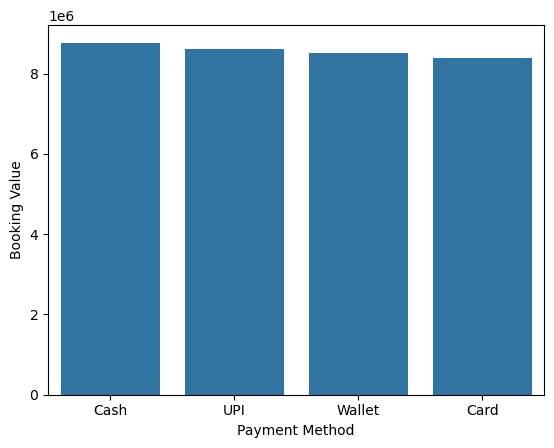

In [196]:
# Total booking value by payment method
rev=df.groupby("Payment Method")[['Booking Value']].sum().sort_values(by="Booking Value",ascending=False).round(0)
sns.barplot(x="Payment Method",y="Booking Value",data=rev)
plt.savefig('Revenue by Payment Method.png', dpi=300, bbox_inches='tight')
plt.show()

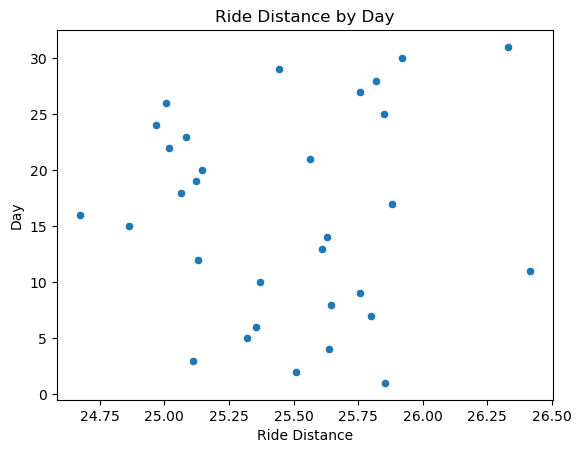

In [137]:
# Ride distance distribution per day
sns.scatterplot(x="Ride Distance",y="Day",data=dis)
plt.title("Ride Distance by Day")
plt.savefig('Ride Distance By day.png', dpi=300, bbox_inches='tight')
plt.show()               

### Top 5 Customers by Booking Value

In [11]:
(df.groupby("Customer ID")[["Booking Value"]]
 .sum()
 .sort_values(by="Booking Value",ascending=False)
 .iloc[:5]
)

,Booking Value
Customer ID,
580524,5078.20
599413,4263.67
617275,3929.33
428477,3909.54
647438,3891.43
